In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

In [16]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [17]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)


train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1506 images belonging to 3 classes.


In [3]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6585122  0.64674747 0.6898847 ]
  [0.6569333  0.6451686  0.68830585]
  [0.65535456 0.64358985 0.6867271 ]
  ...
  [0.69596076 0.68419605 0.7273333 ]
  [0.687942   0.6761773  0.7193146 ]
  [0.68031436 0.66854966 0.7116869 ]]

 [[0.67598176 0.66421705 0.7073543 ]
  [0.67400825 0.66224355 0.70538086]
  [0.67203474 0.66027004 0.7034073 ]
  ...
  [0.69556606 0.68380135 0.7269386 ]
  [0.6867579  0.6749932  0.71813047]
  [0.67991966 0.66815495 0.7112922 ]]

 [[0.66047114 0.6468633  0.6955299 ]
  [0.6659969  0.6527838  0.7002663 ]
  [0.6715228  0.6587044  0.7050027 ]
  ...
  [0.69517136 0.68340665 0.72654396]
  [0.6855738  0.6738091  0.7169464 ]
  [0.67952496 0.66776025 0.7108975 ]]

 ...

 [[0.5265838  0.5148191  0.55795634]
  [0.5251174  0.5133527  0.55648994]
  [0.5211014  0.5040682  0.54931283]
  ...
  [0.6002932  0.58536744 0.6295584 ]
  [0.6018721  0.58576214 0.6303478 ]
  [0.60345083 0.58615685 0.63113725]]

 [[0.5269785  0.5152138  0.55835104]
  [0.52353853 0.5117738  0.5549111 ]


In [4]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)


validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)


test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 431 images belonging to 3 classes.


In [7]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
   layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32 , (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),  # 64 neurons
    layers.Dense(n_classes, activation = 'softmax') #n_classes = 3 i.e 3 neurons we'll have #softmax will normalize probability of our classes

])

2023-03-10 00:28:30.144287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 00:28:30.145197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [9]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] #in each epoh what type of metric will you use to track Gradient Descent
    # so here we are using accuracy to track training process

)

In [10]:
1506/32 #steps per epoch for train data calculation

47.0625

In [11]:
215/32 #steps per epoch for validation data

6.71875

In [12]:
model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20


2023-03-10 00:34:53.221129: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-10 00:34:53.506801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.9550 - accuracy: 0.4607

2023-03-10 00:35:05.828326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 14s 260ms/step - loss: 0.9550 - accuracy: 0.4607 - val_loss: 0.8963 - val_accuracy: 0.4583
Epoch 2/20
47/47 [==============================] - 11s 228ms/step - loss: 0.8502 - accuracy: 0.5502 - val_loss: 0.7161 - val_accuracy: 0.6667
Epoch 3/20
47/47 [==============================] - 11s 227ms/step - loss: 0.5715 - accuracy: 0.7666 - val_loss: 0.4154 - val_accuracy: 0.8229
Epoch 4/20
47/47 [==============================] - 11s 229ms/step - loss: 0.3648 - accuracy: 0.8460 - val_loss: 0.3560 - val_accuracy: 0.8594
Epoch 5/20
47/47 [==============================] - 11s 227ms/step - loss: 0.2827 - accuracy: 0.8813 - val_loss: 0.3746 - val_accuracy: 0.8125
Epoch 6/20
47/47 [==============================] - 11s 230ms/step - loss: 0.2640 - accuracy: 0.9050 - val_loss: 0.2173 - val_accuracy: 0.9062
Epoch 7/20
47/47 [==============================] - 11s 227ms/step - loss: 0.4147 - accuracy: 0.8216 - val_loss: 0.3053 - val_accuracy: 0.8750
Epoch 8/20

In [13]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 3s 221ms/step - loss: 0.1318 - accuracy: 0.9536


First image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 22ms/step
Predicted label: Potato___Early_blight


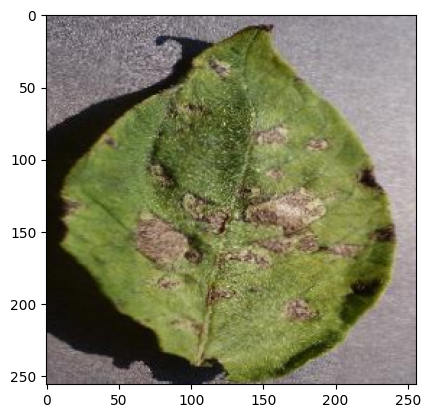

In [25]:
import numpy as np
for image_batch, label_batch in test_generator: # we are taking 1st batch of images
   first_image = image_batch[0] # we are considering 1st single image here
   first_label = int(label_batch[0])

   print("First image to predict")
   plt.imshow(first_image)
   print("actual label:",class_names[first_label])

   batch_prediction = model.predict(image_batch)  # this will store prediction of 1st image batch on batch_prediction
   print("Predicted label:",class_names[ np.argmax(batch_prediction[0]) ])  #batch_prediction[0] -> prediction of 1st image in batch
   break

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [1]:
model.save("./potatoes.h5")


NameError: name 'model' is not defined